In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import zipfile

%matplotlib inline
sns.set_style('whitegrid')
current_palette = sns.color_palette()


In [2]:
pip install seaborn 

    100% |████████████████████████████████| 215kB 3.5MB/s ta 0:00:01
You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import zipfile

%matplotlib inline
sns.set_style('whitegrid')
current_palette = sns.color_palette()





In [50]:
crime_vancouver = pd.read_csv(('crime_csv_all_years.csv'))

In [51]:
crime_vancouver

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Theft from Vehicle,2003,5,14,0.0,0.0,11XX CONNAUGHT DR,Shaughnessy,490368.39,5454609.25
1,Break and Enter Residential/Other,2003,5,19,22.0,30.0,18XX COMOX ST,West End,489813.77,5459590.38
2,Theft from Vehicle,2003,1,17,21.0,30.0,21XX YORK AVE,Kitsilano,488818.32,5457672.40
3,Theft from Vehicle,2003,1,17,18.0,30.0,21XX YORK AVE,Kitsilano,488818.32,5457672.40
4,Theft from Vehicle,2003,5,17,17.0,0.0,6XX BURRARD ST,Central Business District,491279.21,5459177.42
5,Break and Enter Residential/Other,2003,1,18,9.0,0.0,33XX E 2ND AVE,Hastings-Sunrise,497666.36,5457305.02
6,Offence Against a Person,2003,11,1,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.00,0.00
7,Break and Enter Residential/Other,2003,7,7,11.0,0.0,66XX MAIN ST,Sunset,492601.32,5452351.02
8,Theft from Vehicle,2003,1,10,1.0,0.0,21XX YORK AVE,Kitsilano,488818.32,5457672.40
9,Theft from Vehicle,2003,11,3,17.0,55.0,BURRARD ST / COMOX ST,West End,490757.46,5458643.86


In [52]:
crime_vancouver.isnull().sum()

TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR             60661
MINUTE           60661
HUNDRED_BLOCK       13
NEIGHBOURHOOD    63100
X                    0
Y                    0
dtype: int64

In [53]:
crime_vancouver['TYPE'].value_counts() ## TYPES OF CRIMES

Theft from Vehicle                                        201841
Mischief                                                   81385
Break and Enter Residential/Other                          65271
Other Theft                                                62350
Offence Against a Person                                   60414
Theft of Vehicle                                           40831
Break and Enter Commercial                                 37799
Theft of Bicycle                                           29724
Vehicle Collision or Pedestrian Struck (with Injury)       24669
Vehicle Collision or Pedestrian Struck (with Fatality)       284
Homicide                                                     247
Name: TYPE, dtype: int64

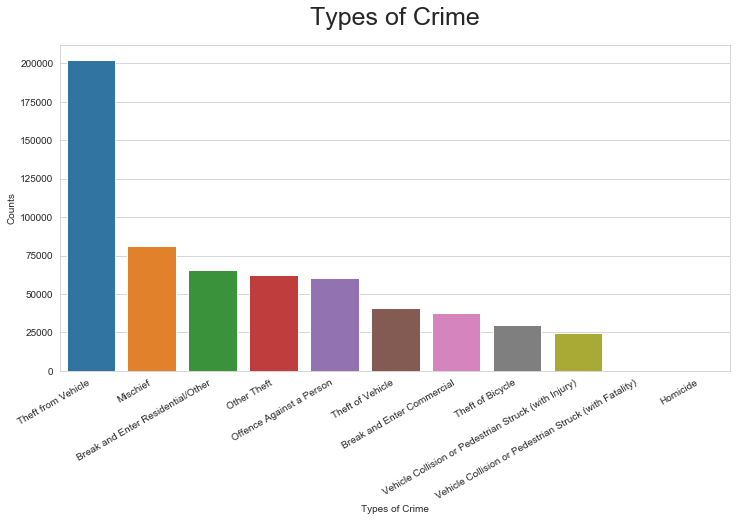

In [55]:
plt.figure(figsize=(12,6))
plt.title('Types of Crime',fontdict={'fontsize':'25'},pad=20)
ax = sns.countplot(x='TYPE',data=crime_vancouver, order = crime_vancouver['TYPE'].value_counts().index,palette=current_palette)
ax.set(xlabel='Types of Crime')
ax.set(ylabel='Counts')
plt.setp(ax.get_xticklabels(),rotation=30,  horizontalalignment='right')

plt.savefig('types.png')


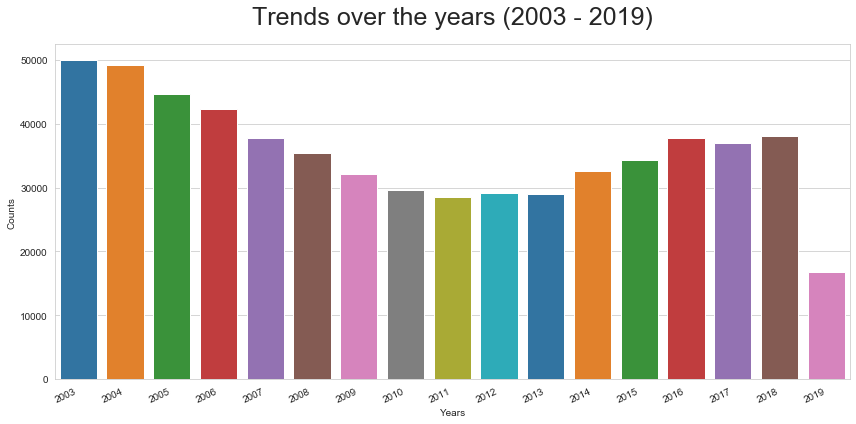

In [62]:
## Trends over the years ##

plt.figure(figsize=(12,6))
plt.title('Trends over the years (2003 - 2019)',fontdict={'fontsize':'25'},pad=20)
ax = sns.countplot(x='YEAR',data=crime_vancouver,palette=current_palette)
ax.set(xlabel='Years', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()
plt.savefig('trends.png')

In [73]:
## SAFEST AREA IN VANCOUVER ##

crime_vancouver['counter'] = 1
safe_region = crime_vancouver.groupby(['NEIGHBOURHOOD']).count()['counter'].sort_values(ascending=True).head(10)
safe_region

NEIGHBOURHOOD
Musqueam               568
Stanley Park          4097
South Cambie          5838
Shaughnessy           6185
West Point Grey       6569
Arbutus Ridge         6668
Kerrisdale            8253
Dunbar-Southlands     8591
Oakridge              9031
Killarney            11556
Name: counter, dtype: int64

In [75]:
danger_region = crime_vancouver.groupby(['NEIGHBOURHOOD']).count()['counter'].sort_values(ascending=False).head(10)
danger_region

NEIGHBOURHOOD
Central Business District    131962
West End                      47202
Fairview                      35802
Mount Pleasant                35115
Grandview-Woodland            30746
Renfrew-Collingwood           30348
Kitsilano                     29890
Kensington-Cedar Cottage      27677
Strathcona                    24688
Hastings-Sunrise              20639
Name: counter, dtype: int64

In [82]:
months = crime_vancouver.groupby(['MONTH']).count()['counter'].sort_values(ascending=False).head(12)
months

MONTH
5     53437
8     52690
1     52029
3     51500
6     51289
10    51132
7     50786
4     50393
9     50368
11    48553
12    46730
2     45908
Name: counter, dtype: int64

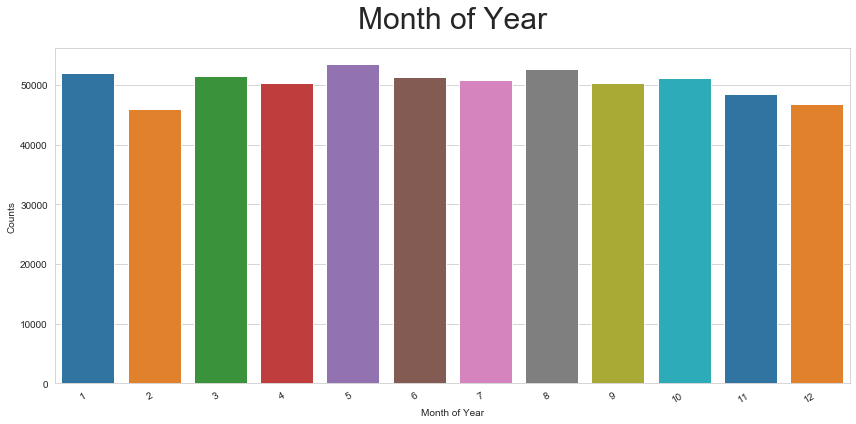

In [84]:
plt.figure(figsize=(12,6))
plt.title('Month of Year',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='MONTH',data=crime_vancouver,palette=current_palette)
ax.set(xlabel='Month of Year')
ax.set(ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.savefig('monthsofyear.png')

In [86]:
crime_vancouver.groupby(['DAY']).count()['counter'].sort_values(ascending=False).head(10)

DAY
1     22341
15    21957
12    20971
14    20851
13    20740
7     20683
11    20651
16    20640
17    20583
8     20582
Name: counter, dtype: int64

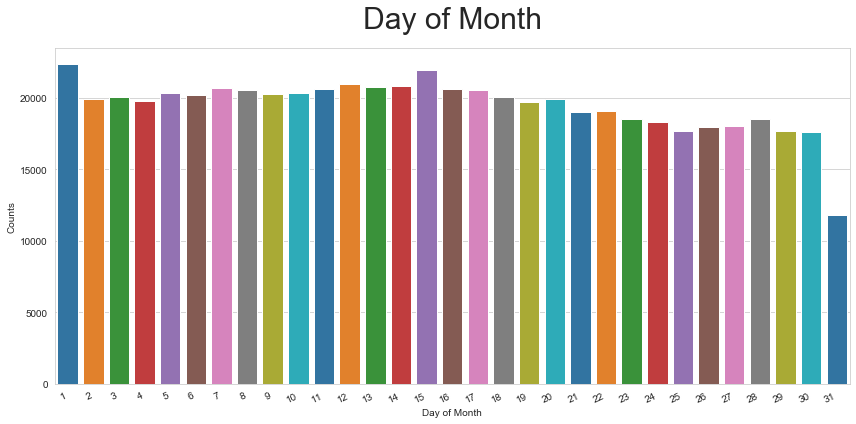

In [88]:
plt.figure(figsize=(12,6))
plt.title('Day of Month',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='DAY',data=crime_vancouver,palette=current_palette)
ax.set(xlabel='Day of Month')
ax.set(ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()
plt.savefig('daysofmonth.png')


In [91]:
crime_vancouver.groupby(['HOUR']).count()['counter'].sort_values(ascending=False).head(10)

HOUR
18.0    41454
17.0    36312
19.0    34167
22.0    32660
20.0    31940
21.0    31339
0.0     31083
16.0    30067
15.0    27378
23.0    27343
Name: counter, dtype: int64

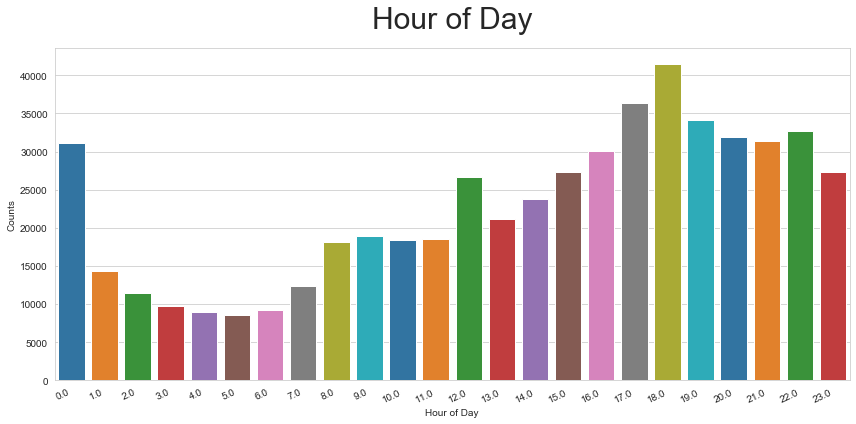

In [92]:
plt.figure(figsize=(12,6))
plt.title('Hour of Day',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='HOUR',data=crime_vancouver,palette=current_palette)
ax.set(xlabel='Hour of Day')
ax.set(ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()
plt.savefig('hourofday.png')